# Wrangling of Accident Claims Data 2011-2017 - active claims - R code 

The active dataframes are as follows: 

In [6]:
# wide df

#gender_df
#age_df 
#ethnicity_df 
#months_df 
#road_factor_df
#region_df

# long df

#gender_long_df
#age_long_df 
#ethnicity_long_df 
#months_long_df 
#road_factor_long_df
#region_long_df

### workflow extracting data from the CSV file

In [18]:
# replace header with new column names and skip first few lines of csv 

names_variables <- c("features", "2011", "2012", "2013", "2014", "2015", "2016", "2017")

active_claims_csv <- "active_claimsCSV.csv" %>%
              read_csv(col_names = names_variables, skip = 5) 

active_claims_csv
# so the featurs column is character data type and the years columns are number type

Parsed with column specification:
cols(
  features = col_character(),
  `2011` = col_number(),
  `2012` = col_number(),
  `2013` = col_number(),
  `2014` = col_number(),
  `2015` = col_number(),
  `2016` = col_number(),
  `2017` = col_number()
)



features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,23010,22744,23365,22483,23157,24402,24957
Male,25948,25172,25834,25058,25433,26621,27247
Client Age,NA,NA,NA,NA,NA,NA,NA
00 to 19 Years of age,9303,8485,8574,7916,7755,8165,8291
20 to 29 Years of age,11318,11126,11438,11103,11362,12029,12311
30 to 39 Years of age,8029,7800,7936,7733,7842,8383,8627
40 to 49 Years of age,8415,8255,8345,8032,8257,8428,8408
50 to 59 Years of age,6030,6194,6506,6614,6895,7127,7262
60 to 69 Years of age,3264,3379,3572,3566,3776,3952,4244


In [19]:
active_claims_csv %>%
     glimpse()  

Rows: 65
Columns: 8
$ features <chr> "Female", "Male", "Client Age", "00 to 19 Years of age", "20…
$ `2011`   <dbl> 23010, 25948, NA, 9303, 11318, 8029, 8415, 6030, 3264, 1653,…
$ `2012`   <dbl> 22744, 25172, NA, 8485, 11126, 7800, 8255, 6194, 3379, 1745,…
$ `2013`   <dbl> 23365, 25834, NA, 8574, 11438, 7936, 8345, 6506, 3572, 1823,…
$ `2014`   <dbl> 22483, 25058, NA, 7916, 11103, 7733, 8032, 6614, 3566, 1662,…
$ `2015`   <dbl> 23157, 25433, NA, 7755, 11362, 7842, 8257, 6895, 3776, 1798,…
$ `2016`   <dbl> 24402, 26621, NA, 8165, 12029, 8383, 8428, 7127, 3952, 1967,…
$ `2017`   <dbl> 24957, 27247, NA, 8291, 12311, 8627, 8408, 7262, 4244, 2096,…


In [20]:
# make wide tibble of gender by years 
gender_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(1:2)
gender_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,23010,22744,23365,22483,23157,24402,24957
Male,25948,25172,25834,25058,25433,26621,27247


In [21]:
# make wide tibble of age ranges by years 
age_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(4:11)
age_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00 to 19 Years of age,9303,8485,8574,7916,7755,8165,8291
20 to 29 Years of age,11318,11126,11438,11103,11362,12029,12311
30 to 39 Years of age,8029,7800,7936,7733,7842,8383,8627
40 to 49 Years of age,8415,8255,8345,8032,8257,8428,8408
50 to 59 Years of age,6030,6194,6506,6614,6895,7127,7262
60 to 69 Years of age,3264,3379,3572,3566,3776,3952,4244
70 to 79 Years of age,1653,1745,1823,1662,1798,1967,2096
80 Years and older,946,932,1005,915,905,972,965


In [22]:
age_df$features[1:8] <- c("00-19","20-29","30-39","40-49","50-59","60-69","70-79","80+")
age_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00-19,9303,8485,8574,7916,7755,8165,8291
20-29,11318,11126,11438,11103,11362,12029,12311
30-39,8029,7800,7936,7733,7842,8383,8627
40-49,8415,8255,8345,8032,8257,8428,8408
50-59,6030,6194,6506,6614,6895,7127,7262
60-69,3264,3379,3572,3566,3776,3952,4244
70-79,1653,1745,1823,1662,1798,1967,2096
80+,946,932,1005,915,905,972,965


In [23]:
# make wide tibble of ethnicity by years 
ethnicity_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(13:17)
ethnicity_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,3281,3376,3533,3570,3956,4247,4646
European,33137,32324,33100,31964,32460,33858,34186
Maori,6887,6695,6859,6615,6858,7343,7601
Other Ethnicities /Not stated,3707,3599,3632,3406,3216,3291,3401
Pacific Peoples,1946,1922,2075,1986,2100,2284,2370


In [24]:
# make wide tibble of months by years 
months_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(19:30)
months_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
January,12004,11750,12035,11497,11872,12817,13149
February,12521,11957,12276,12112,12894,13375,13865
March,13474,12645,12724,13322,13924,14905,15011
April,12078,13393,12929,12898,13562,13801,14844
May,13810,13387,13694,13063,13965,14734,15808
June,13128,12792,13132,13278,14426,14533,15236
July,13372,13183,13566,13777,13479,14074,14255
August,13266,13184,13111,12962,12978,14270,14914
September,13495,12484,12761,13211,13460,13966,14409


In [25]:
# make wide tibble of road factor by years 
road_factor_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(32:41)
road_factor_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATV,20,24,42,47,49,61,52
Cycling,2470,2501,2508,2318,2283,2186,2182
Driving/Passenger - Bus,730,741,674,668,742,886,767
Driving/Passenger - Car,32777,32004,32970,31661,32615,33705,34122
Driving/Passenger - Motorcycle,7113,6933,7099,7247,7168,7410,7589
Driving/Passenger - Truck,1044,990,1056,991,1070,1153,1111
Driving/Passenger-Other Veh,868,989,1106,1062,1191,1908,2584
Not Obtainable,399,388,420,377,358,396,511
Other,196,231,273,255,240,334,282


In [26]:
# make wide tibble of region by years 
region_df <- active_claims_csv %>%
    select (features:"2017")%>%
    slice(43:60)
region_df

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,2168,2296,2301,2228,2293,2504,2636
Auckland,13615,13612,14141,13694,14678,15674,15955
Waikato,4954,5021,5149,5024,5093,5336,5695
Bay of Plenty,2769,2775,2788,2613,2810,3019,3053
Gisborne,472,482,490,482,442,526,521
Hawkes Bay,1846,1754,1810,1641,1623,1785,1763
Taranaki,1115,1090,1104,1041,1041,1078,1149
Manawatu-Wanganui,2780,2568,2647,2549,2503,2604,2593
Wellington,3706,3462,3465,3287,3213,3488,3640


In [27]:
# make function to convert wide to long df 
wide_to_long <- function(wide_df) {
    long_df <- pivot_longer(wide_df, cols= "2011":"2017", names_to= "year", values_to= "active_claims")
    long_df_numeric <-transform(long_df, year = as.numeric(year))
    return(long_df_numeric)
}

In [28]:
gender_long_df <- gender_df %>%
    wide_to_long()%>%
    glimpse() %>%
    rename(gender = features)

gender_long_df

Rows: 14
Columns: 3
$ features      <chr> "Female", "Female", "Female", "Female", "Female", "Fema…
$ year          <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 2…
$ active_claims <dbl> 23010, 22744, 23365, 22483, 23157, 24402, 24957, 25948,…


gender,year,active_claims
<chr>,<dbl>,<dbl>
Female,2011,23010
Female,2012,22744
Female,2013,23365
Female,2014,22483
Female,2015,23157
Female,2016,24402
Female,2017,24957
Male,2011,25948
Male,2012,25172


In [29]:
age_long_df <- age_df %>%
    wide_to_long()%>%
    rename(age = features)
age_long_df

age,year,active_claims
<chr>,<dbl>,<dbl>
00-19,2011,9303
00-19,2012,8485
00-19,2013,8574
00-19,2014,7916
00-19,2015,7755
00-19,2016,8165
00-19,2017,8291
20-29,2011,11318
20-29,2012,11126


In [30]:
ethnicity_long_df <- ethnicity_df %>%
    wide_to_long()%>%
    rename(ethnicity = features)

ethnicity_long_df

ethnicity,year,active_claims
<chr>,<dbl>,<dbl>
Asian,2011,3281
Asian,2012,3376
Asian,2013,3533
Asian,2014,3570
Asian,2015,3956
Asian,2016,4247
Asian,2017,4646
European,2011,33137
European,2012,32324


In [31]:
months_long_df <- months_df %>%
    wide_to_long()%>%
    rename(month = features)

months_long_df

month,year,active_claims
<chr>,<dbl>,<dbl>
January,2011,12004
January,2012,11750
January,2013,12035
January,2014,11497
January,2015,11872
January,2016,12817
January,2017,13149
February,2011,12521
February,2012,11957


In [32]:
road_factor_long_df <- road_factor_df %>%
    wide_to_long()%>%
    rename(road_factor = features)

road_factor_long_df

road_factor,year,active_claims
<chr>,<dbl>,<dbl>
ATV,2011,20
ATV,2012,24
ATV,2013,42
ATV,2014,47
ATV,2015,49
ATV,2016,61
ATV,2017,52
Cycling,2011,2470
Cycling,2012,2501


In [33]:
region_long_df <- region_df %>%
    wide_to_long()%>%
    rename(region = features)

region_long_df

region,year,active_claims
<chr>,<dbl>,<dbl>
Northland,2011,2168
Northland,2012,2296
Northland,2013,2301
Northland,2014,2228
Northland,2015,2293
Northland,2016,2504
Northland,2017,2636
Auckland,2011,13615
Auckland,2012,13612


## Some summarising of the DATA 

In [34]:
# Here will count total number of claims and validate that the information has been reatained across all dataframes 

road_factor_long_df %>%
  tally(active_claims)

n
<dbl>
345431


In [35]:
region_long_df %>%
  tally(active_claims)

n
<dbl>
345431


In [36]:
gender_long_df %>%
  tally(active_claims)

n
<dbl>
345431


In [37]:
age_long_df %>%
  tally(active_claims)

n
<dbl>
345431


In [38]:
# NOT SURE WHY THIS IS LARGER THAN OTHERS  ? 
months_long_df %>%
  tally(active_claims)

n
<dbl>
1125160


In [39]:
road_factor_long_df%>%
  tally(active_claims)

n
<dbl>
345431


In [40]:
region_long_df%>%
  tally(active_claims)

n
<dbl>
345431


In [41]:
# group by year and find average claims per year,  order by largest first

region_long_df %>%
  group_by(year) %>%
  summarise(mean_active_claims = mean(active_claims)) %>%
  arrange(desc(mean_active_claims))

`summarise()` ungrouping output (override with `.groups` argument)



year,mean_active_claims
<dbl>,<dbl>
2017,2900.222
2016,2834.611
2013,2733.278
2011,2719.889
2015,2699.444
2012,2662.000
2014,2641.167


In [42]:
# different values for mean active claims obtained from age tibble
gender_long_df %>%
  group_by(year) %>%
  summarise(mean_active_claims = mean(active_claims)) %>%
  arrange(desc(mean_active_claims))

`summarise()` ungrouping output (override with `.groups` argument)



year,mean_active_claims
<dbl>,<dbl>
2017,26102.0
2016,25511.5
2013,24599.5
2011,24479.0
2015,24295.0
2012,23958.0
2014,23770.5


`summarise()` ungrouping output (override with `.groups` argument)



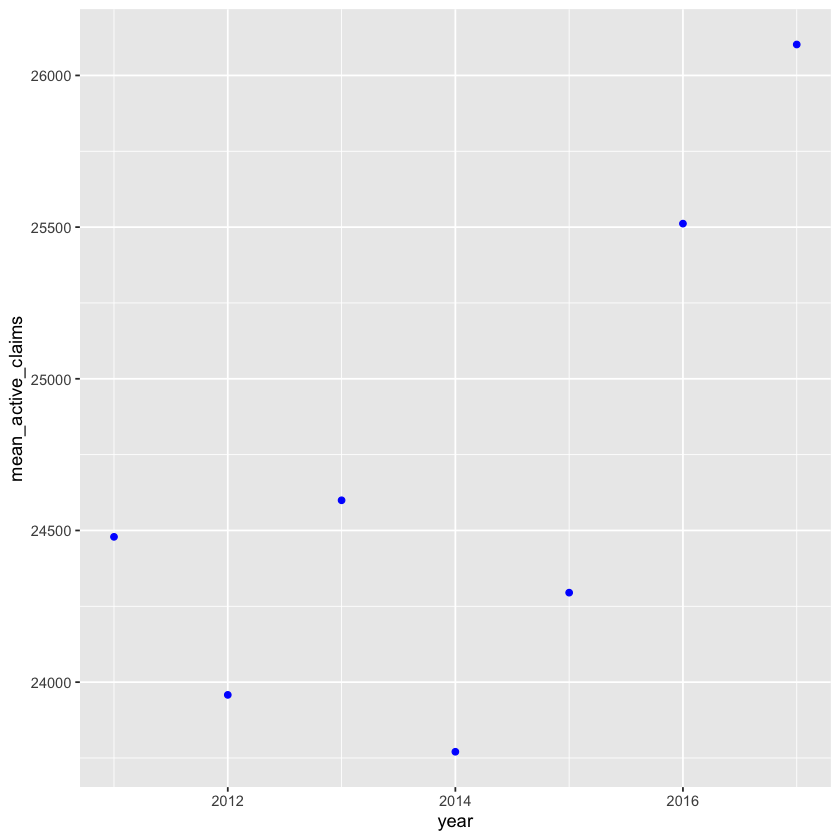

In [43]:
# Plot the average active claim data for each year of the age tibble
gender_long_df %>%
  group_by(year) %>%
  summarise(mean_active_claims = mean(active_claims)) %>%
  ggplot(aes(x = year, y = mean_active_claims)) +
  geom_point(color='blue') 

# Wrangling of Accident Claims Data 2011-2017 - New Claims

In [44]:
# wide df for new claims

#gender_df2
#age_df2 
#ethnicity_df2 
#months_df2 
#road_factor_df2
#region_df2

# long df for new claims

#gender_long_df2
#age_long_df2 
#ethnicity_long_df2 
#months_long_df2 
#road_factor_long_df2
#region_long_df2

In [45]:
names_variables <- c("features", "2011", "2012", "2013", "2014", "2015", "2016", "2017")

New_claims_csv <- "NewClaims.csv" %>%
              read_csv(col_names = names_variables, skip = 5) 

New_claims_csv

Parsed with column specification:
cols(
  features = col_character(),
  `2011` = col_number(),
  `2012` = col_number(),
  `2013` = col_number(),
  `2014` = col_number(),
  `2015` = col_number(),
  `2016` = col_number(),
  `2017` = col_number()
)

Warning message:
“60 parsing failures.
row col  expected    actual            file
  1  -- 8 columns 9 columns 'NewClaims.csv'
  2  -- 8 columns 9 columns 'NewClaims.csv'
  3  -- 8 columns 9 columns 'NewClaims.csv'
  4  -- 8 columns 9 columns 'NewClaims.csv'
  5  -- 8 columns 9 columns 'NewClaims.csv'
... ... ......... ......... ...............
See problems(...) for more details.
”


features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,16642,16321,16865,16658,18639,19488,19704
Male,15657,15360,15580,15840,17506,18390,18892
Client Age,NA,NA,NA,NA,NA,NA,NA
00 to 19 Years of age,6465,5863,5932,5780,6341,6671,6706
20 to 29 Years of age,7562,7438,7528,7802,8889,9418,9600
30 to 39 Years of age,4650,4594,4706,4719,5279,5644,5835
40 to 49 Years of age,5170,5108,5104,4958,5425,5487,5462
50 to 59 Years of age,4034,4094,4305,4454,4915,4960,5100
60 to 69 Years of age,2379,2452,2612,2673,2919,3115,3259


In [46]:
# make wide tibble of gender by years 
gender_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(1:2)
gender_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,16642,16321,16865,16658,18639,19488,19704
Male,15657,15360,15580,15840,17506,18390,18892


In [47]:
# make wide tibble of age ranges by years 
age_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(4:11)
age_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00 to 19 Years of age,6465,5863,5932,5780,6341,6671,6706
20 to 29 Years of age,7562,7438,7528,7802,8889,9418,9600
30 to 39 Years of age,4650,4594,4706,4719,5279,5644,5835
40 to 49 Years of age,5170,5108,5104,4958,5425,5487,5462
50 to 59 Years of age,4034,4094,4305,4454,4915,4960,5100
60 to 69 Years of age,2379,2452,2612,2673,2919,3115,3259
70 to 79 Years of age,1259,1364,1426,1351,1525,1666,1781
80 Years and older,780,768,832,761,852,917,853


In [48]:
age_df2$features[1:8] <- c("00-19","20-29","30-39","40-49","50-59","60-69","70-79","80+")
age_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00-19,6465,5863,5932,5780,6341,6671,6706
20-29,7562,7438,7528,7802,8889,9418,9600
30-39,4650,4594,4706,4719,5279,5644,5835
40-49,5170,5108,5104,4958,5425,5487,5462
50-59,4034,4094,4305,4454,4915,4960,5100
60-69,2379,2452,2612,2673,2919,3115,3259
70-79,1259,1364,1426,1351,1525,1666,1781
80+,780,768,832,761,852,917,853


In [49]:
# make wide tibble of ethnicity by years 
ethnicity_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(13:17)
ethnicity_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,2784,2917,2982,3191,3874,4042,4401
European,21170,20661,21079,20784,22567,23416,23420
Maori,4450,4311,4347,4564,5399,5842,6015
Other Ethnicities /Not stated,2320,2271,2322,2206,2256,2368,2596
Pacific Peoples,1575,1521,1715,1753,2049,2210,2164


In [50]:
# make wide tibble of months by years 
months_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(19:30)
months_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
January,2416,2575,2578,2420,2800,2946,3135
February,2723,2549,2583,2615,3048,3169,3387
March,3075,2982,2928,3140,3400,3633,3400
April,2510,2855,2695,2643,2850,2776,3045
May,2989,2853,2899,2875,3513,3516,3707
June,2597,2509,2808,2874,3216,3207,3182
July,2652,2755,2771,2750,2928,3070,3155
August,2839,2565,2758,2524,2843,3252,3238
September,2679,2186,2582,2580,2725,2919,3108


In [51]:
# make wide tibble of road factor by years 
road_factor_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(32:41)
road_factor_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATV,10,18,43,38,50,61,45
Cycling,1708,1747,1680,1581,1632,1391,1461
Driving/Passenger - Bus,574,587,556,549,668,788,587
Driving/Passenger - Car,22939,22412,23057,23234,26274,26552,26712
Driving/Passenger - Motorcycle,3644,3524,3687,3753,3833,4057,4205
Driving/Passenger - Truck,481,494,507,497,581,689,613
Driving/Passenger-Other Veh,618,731,866,819,1021,1949,2581
Not Obtainable,22,28,22,20,26,108,198
Other,150,177,205,194,181,266,210


In [52]:
# make wide tibble of region by years 
region_df2 <- New_claims_csv %>%
    select (features:"2017")%>%
    slice(43:60)
region_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,1411,1488,1472,1474,1624,1757,1898
Auckland,10461,10465,10767,10708,12277,12926,12787
Waikato,3254,3281,3434,3480,3852,4162,4415
Bay of Plenty,1931,1847,1905,1867,2284,2476,2404
Gisborne,312,331,344,352,356,411,368
Hawkes Bay,1190,1109,1112,1062,1208,1324,1262
Taranaki,828,802,770,773,828,810,896
Manawatu-Wanganui,1739,1599,1629,1720,1792,1829,1945
Wellington,2679,2492,2515,2383,2610,2825,2873


In [53]:
region_df2 <- region_df2[-c(18), ]
region_df2

features,2011,2012,2013,2014,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northland,1411,1488,1472,1474,1624,1757,1898
Auckland,10461,10465,10767,10708,12277,12926,12787
Waikato,3254,3281,3434,3480,3852,4162,4415
Bay of Plenty,1931,1847,1905,1867,2284,2476,2404
Gisborne,312,331,344,352,356,411,368
Hawkes Bay,1190,1109,1112,1062,1208,1324,1262
Taranaki,828,802,770,773,828,810,896
Manawatu-Wanganui,1739,1599,1629,1720,1792,1829,1945
Wellington,2679,2492,2515,2383,2610,2825,2873


In [54]:
# make function to convert wide to long df 
wide_to_long2 <- function(wide_df) {
    long_df <- pivot_longer(wide_df, cols= "2011":"2017", names_to= "year", values_to= "New_claims")
    long_df_numeric <-transform(long_df, year = as.numeric(year))
    return(long_df_numeric)
}

In [55]:
gender_long_df2 <- gender_df2 %>%
    wide_to_long2()%>%
    glimpse() %>%
    rename(gender = features)

gender_long_df2

Rows: 14
Columns: 3
$ features   <chr> "Female", "Female", "Female", "Female", "Female", "Female"…
$ year       <dbl> 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2011, 2012, 2013…
$ New_claims <dbl> 16642, 16321, 16865, 16658, 18639, 19488, 19704, 15657, 15…


gender,year,New_claims
<chr>,<dbl>,<dbl>
Female,2011,16642
Female,2012,16321
Female,2013,16865
Female,2014,16658
Female,2015,18639
Female,2016,19488
Female,2017,19704
Male,2011,15657
Male,2012,15360


In [56]:
age_long_df2 <- age_df2 %>%
    wide_to_long2()%>%
    rename(age = features)
age_long_df2

age,year,New_claims
<chr>,<dbl>,<dbl>
00-19,2011,6465
00-19,2012,5863
00-19,2013,5932
00-19,2014,5780
00-19,2015,6341
00-19,2016,6671
00-19,2017,6706
20-29,2011,7562
20-29,2012,7438


In [57]:
ethnicity_long_df2 <- ethnicity_df2 %>%
    wide_to_long2()%>%
    rename(ethnicity = features)

ethnicity_long_df2

ethnicity,year,New_claims
<chr>,<dbl>,<dbl>
Asian,2011,2784
Asian,2012,2917
Asian,2013,2982
Asian,2014,3191
Asian,2015,3874
Asian,2016,4042
Asian,2017,4401
European,2011,21170
European,2012,20661


In [58]:
months_long_df2 <- months_df2 %>%
    wide_to_long2()%>%
    rename(month = features)

months_long_df2

month,year,New_claims
<chr>,<dbl>,<dbl>
January,2011,2416
January,2012,2575
January,2013,2578
January,2014,2420
January,2015,2800
January,2016,2946
January,2017,3135
February,2011,2723
February,2012,2549


In [59]:
road_factor_long_df2 <- road_factor_df2 %>%
    wide_to_long2()%>%
    rename(road_factor = features)

road_factor_long_df2

road_factor,year,New_claims
<chr>,<dbl>,<dbl>
ATV,2011,10
ATV,2012,18
ATV,2013,43
ATV,2014,38
ATV,2015,50
ATV,2016,61
ATV,2017,45
Cycling,2011,1708
Cycling,2012,1747


In [60]:
region_long_df2 <- region_df2 %>%
    wide_to_long2()%>%
    rename(region = features)

region_long_df2

region,year,New_claims
<chr>,<dbl>,<dbl>
Northland,2011,1411
Northland,2012,1488
Northland,2013,1472
Northland,2014,1474
Northland,2015,1624
Northland,2016,1757
Northland,2017,1898
Auckland,2011,10461
Auckland,2012,10465


## Joining Active Claims and New Claims dataframes to form a single dataframe
#gender
#age 
#ethnicity 
#month
#road
#region

In [61]:
#install.packages("plyr")


The downloaded binary packages are in
	/var/folders/0b/6qkm96yj6fvd_2d0s27c19n80000gn/T//RtmpTsOQPg/downloaded_packages


In [62]:
library(plyr)
library(dplyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




In [63]:
gender <-join(gender_long_df, gender_long_df2,
     type = "full")
gender

Joining by: gender, year



gender,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
Female,2011,23010,16642
Female,2012,22744,16321
Female,2013,23365,16865
Female,2014,22483,16658
Female,2015,23157,18639
Female,2016,24402,19488
Female,2017,24957,19704
Male,2011,25948,15657
Male,2012,25172,15360


In [64]:
age<-join(age_long_df, age_long_df2,
     type = "full")
age

Joining by: age, year



age,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
00-19,2011,9303,6465
00-19,2012,8485,5863
00-19,2013,8574,5932
00-19,2014,7916,5780
00-19,2015,7755,6341
00-19,2016,8165,6671
00-19,2017,8291,6706
20-29,2011,11318,7562
20-29,2012,11126,7438


In [65]:
ethnicity <- join(ethnicity_long_df, ethnicity_long_df2,
     type = "full")
ethnicity

Joining by: ethnicity, year



ethnicity,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
Asian,2011,3281,2784
Asian,2012,3376,2917
Asian,2013,3533,2982
Asian,2014,3570,3191
Asian,2015,3956,3874
Asian,2016,4247,4042
Asian,2017,4646,4401
European,2011,33137,21170
European,2012,32324,20661


In [66]:
road<-join(road_factor_long_df, road_factor_long_df2,
     type = "full")
road

Joining by: road_factor, year



road_factor,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
ATV,2011,20,10
ATV,2012,24,18
ATV,2013,42,43
ATV,2014,47,38
ATV,2015,49,50
ATV,2016,61,61
ATV,2017,52,45
Cycling,2011,2470,1708
Cycling,2012,2501,1747


In [67]:
region<-join(region_long_df, region_long_df2,
     type = "full")
region

Joining by: region, year



region,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
Northland,2011,2168,1411
Northland,2012,2296,1488
Northland,2013,2301,1472
Northland,2014,2228,1474
Northland,2015,2293,1624
Northland,2016,2504,1757
Northland,2017,2636,1898
Auckland,2011,13615,10461
Auckland,2012,13612,10465


In [68]:
month<-join(months_long_df, months_long_df2,
     type = "full")
month

Joining by: month, year



month,year,active_claims,New_claims
<chr>,<dbl>,<dbl>,<dbl>
January,2011,12004,2416
January,2012,11750,2575
January,2013,12035,2578
January,2014,11497,2420
January,2015,11872,2800
January,2016,12817,2946
January,2017,13149,3135
February,2011,12521,2723
February,2012,11957,2549


In [69]:
#gender %>%
 # write_csv("gender.csv")
#age %>%
 # write_csv("age.csv")
#ethnicity %>%
 # write_csv("ethnicity.csv")
#road %>%
 # write_csv("road.csv")
#region %>%
 # write_csv("region.csv")
#month %>%
  #write_csv("month.csv")